<a href="https://colab.research.google.com/github/veronichaflasma/PCVK_Genap_2021/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow #imagedisplay
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pyplot as plt

 Gamma Correction on citra 
----------------------------------


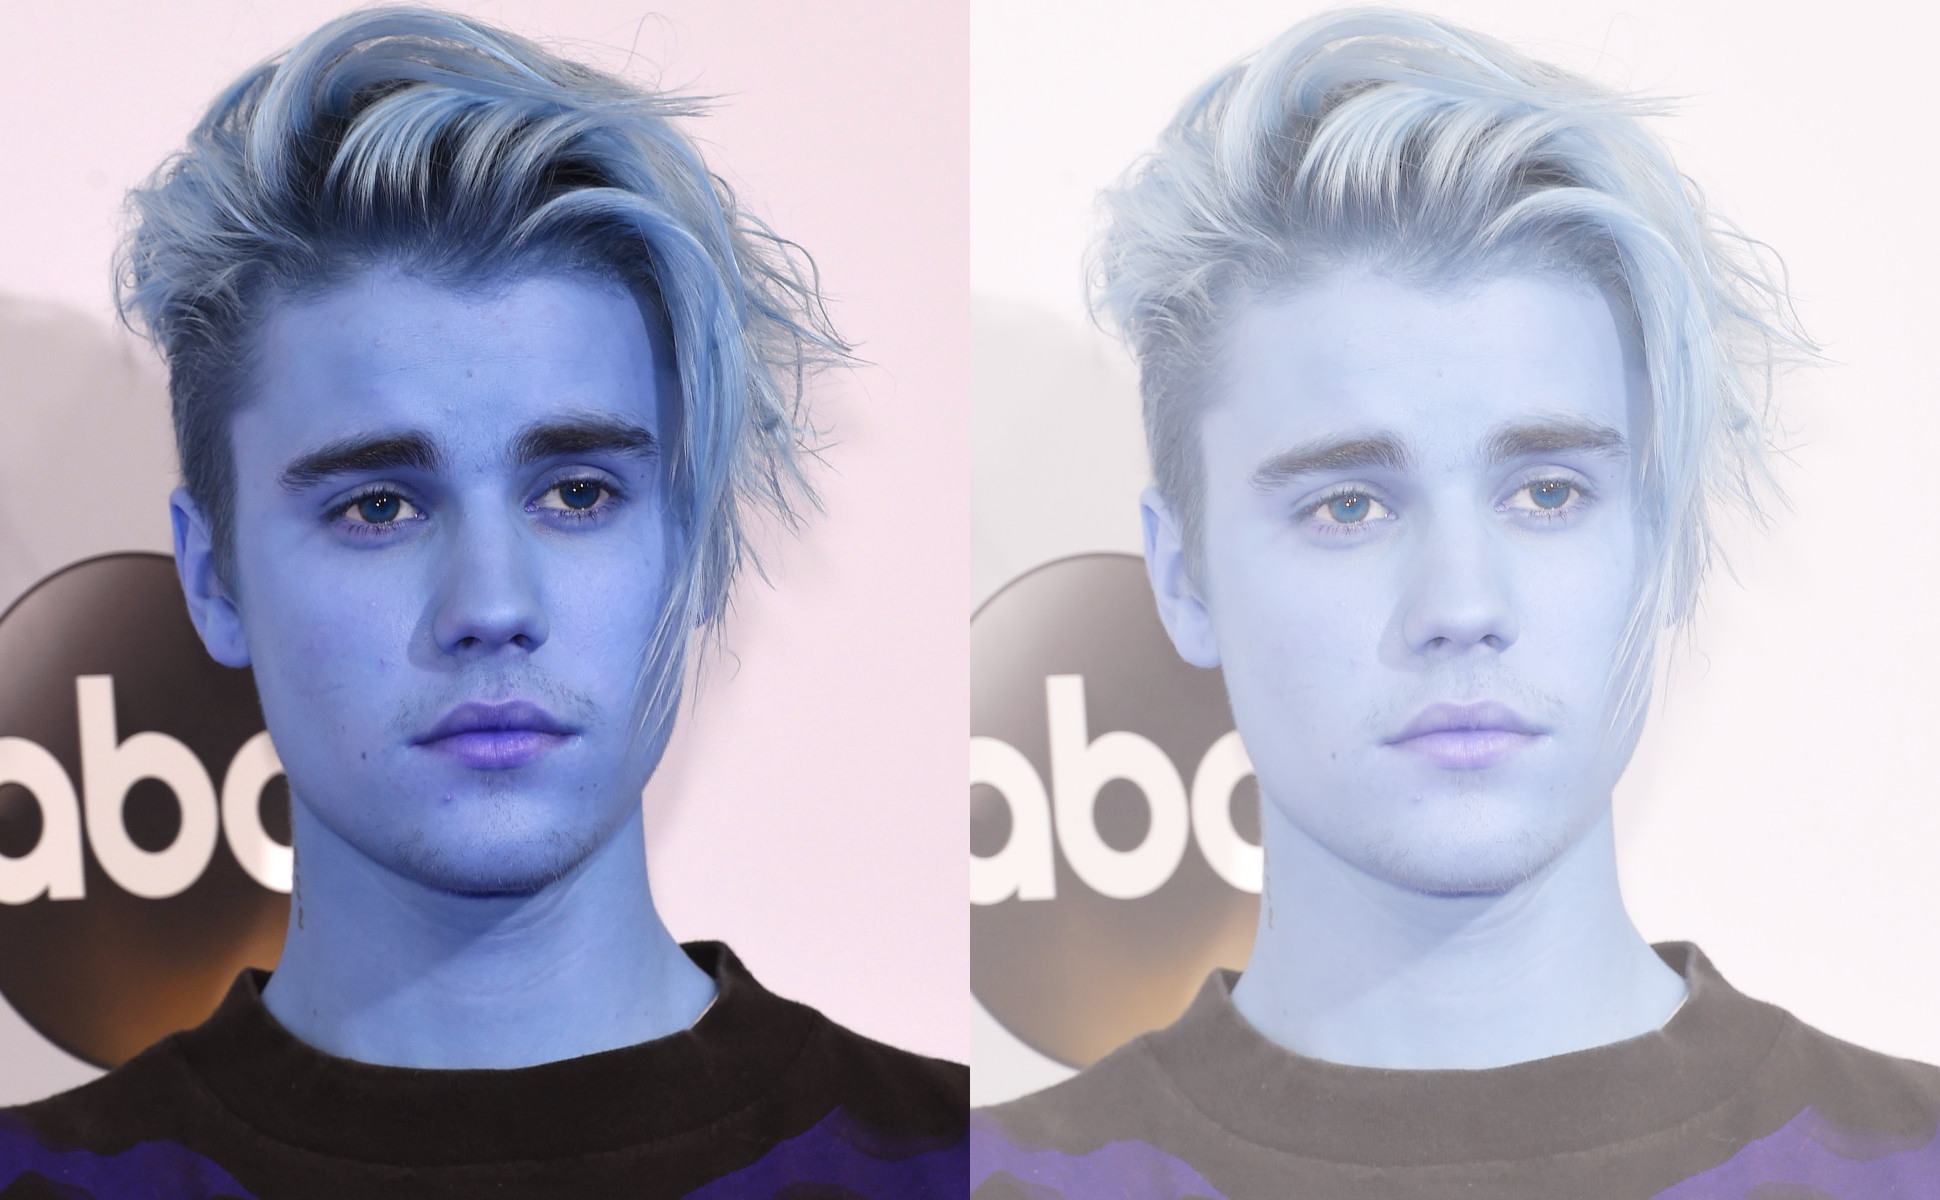

In [ ]:
#NO1
image = cv.imread('/content/drive/MyDrive/Image_PCVK/justinbieber.jpg')
original = cv.cvtColor(image, cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)
print(' Gamma Correction on citra ')
print('----------------------------------')
try:
  gamma = int(input('Input Gamma Value :  '))
except ValueError:
  print('Error, not a number')

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255, (1/gamma)),0,255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

Gamma Correction on citra 
--------------------------


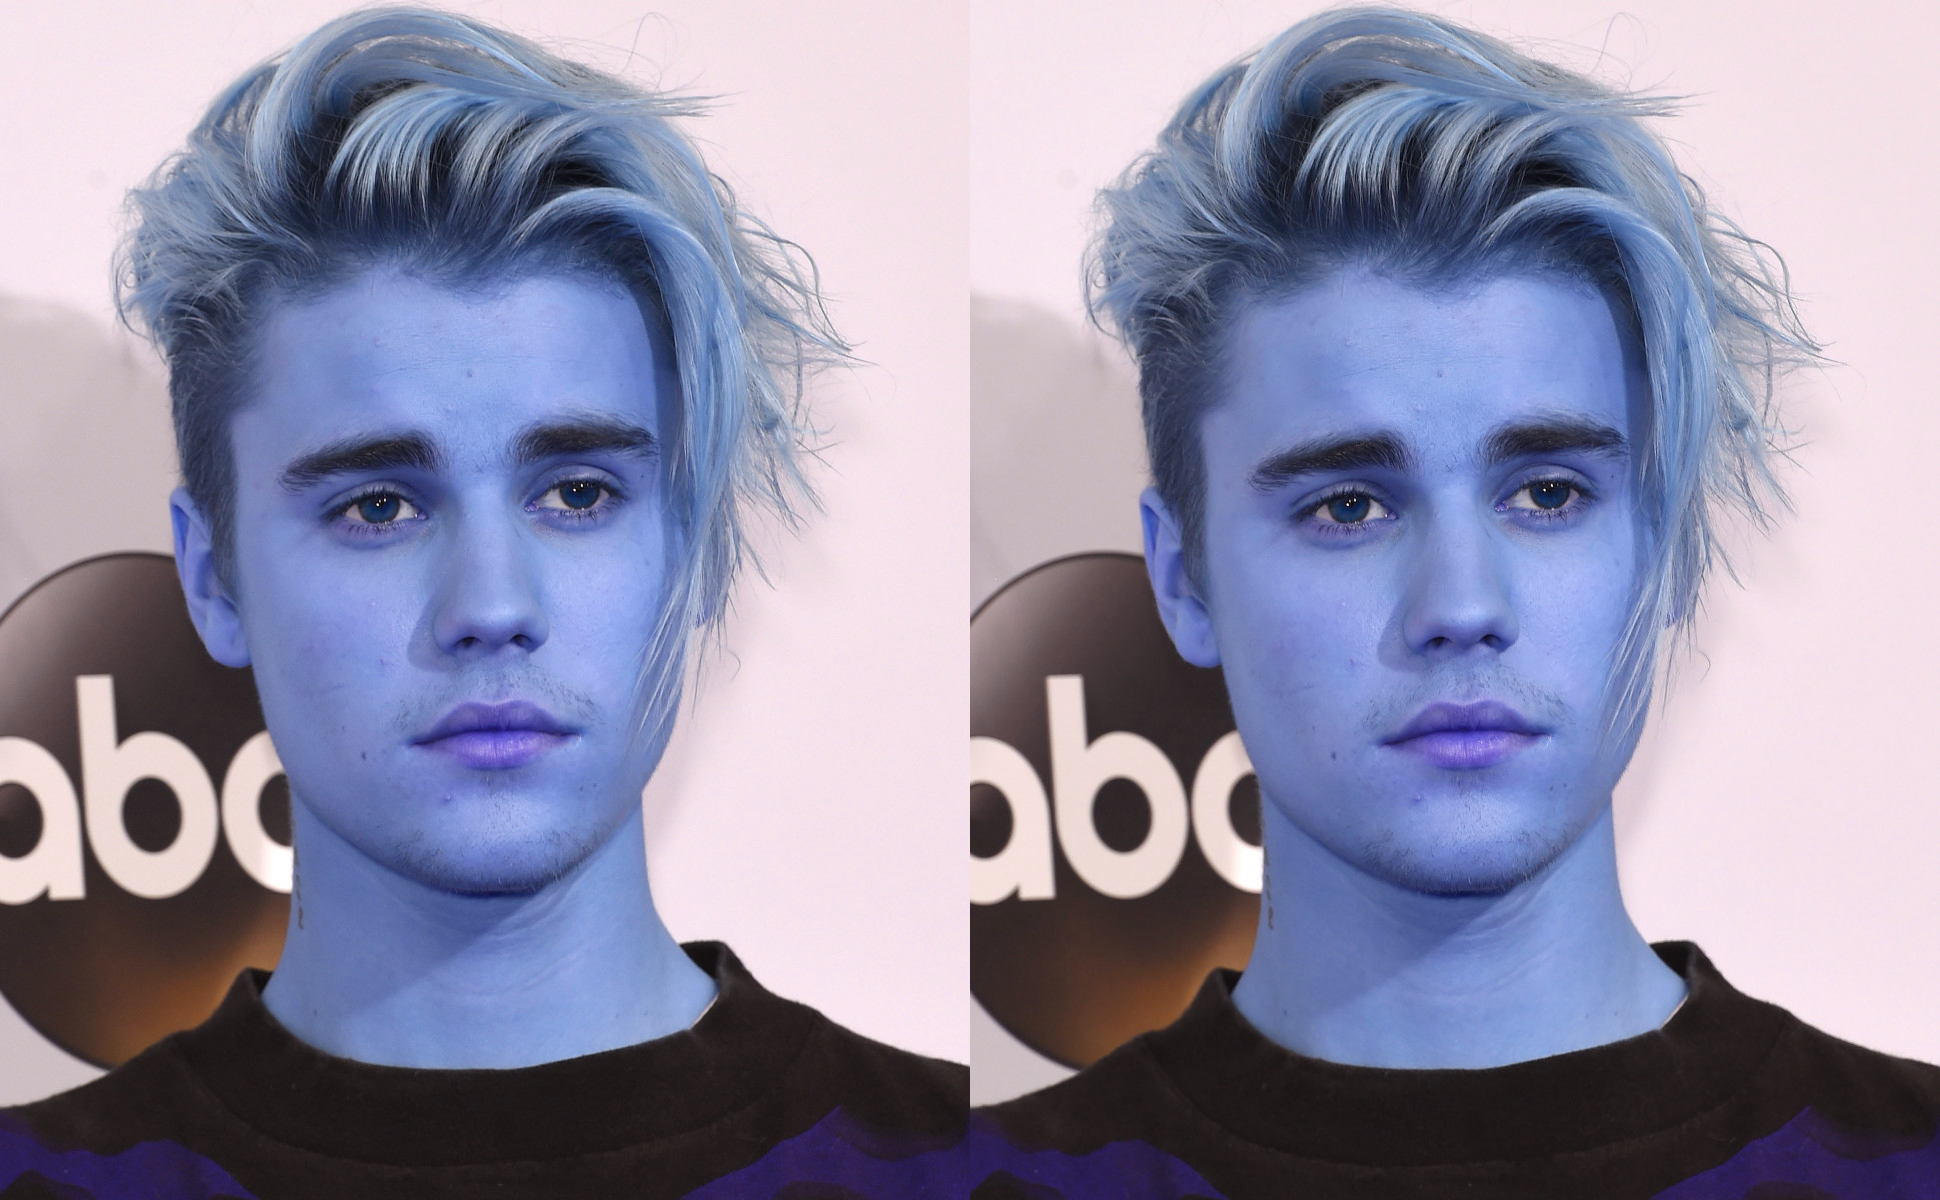

In [ ]:
#NO2
original = cv.cvtColor(image, cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

print('Gamma Correction on citra ')
print('--------------------------')
try:
  bd = float(input('Input bit depth value : '))
except ValueError:
  print('Error, not a number')
bit=2**bd
level = 255/(bit-1)
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(round(original[y,x,c]/level)*level,0,255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Nilai Psnr adalah 27.53151168973261 (dB)


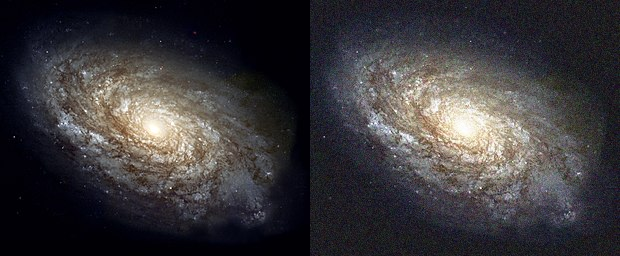

In [8]:
#NO3 AV 5
import glob
from math import log10, sqrt
  
original = cv.imread('/content/drive/MyDrive/Image_PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Image_PCVK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal. 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai Psnr adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Psnr value 27.515163408807815 (dB)


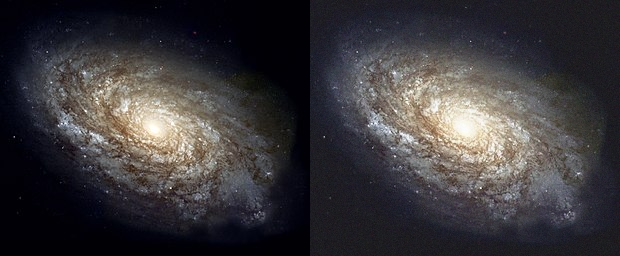

In [9]:
#NO3 AV 30

dst = cv_img[0]
noise_number = 29 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Psnr value',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Psnr value 27.49629638144608 (dB)


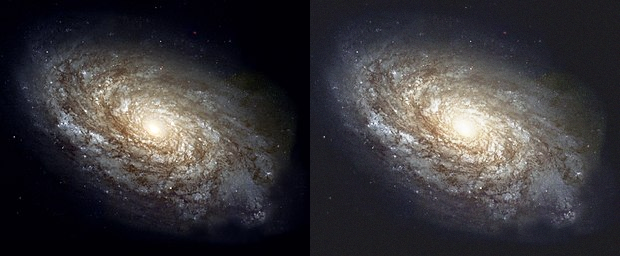

In [10]:
#NO3 AV 60

dst = cv_img[0]
noise_number = 59 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Psnr value',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))

cv2_imshow(galaxy_frame)

Psnr value 27.510683760437658 (dB)


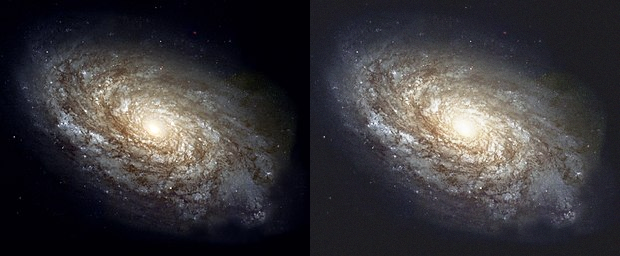

In [11]:
#NO3 AV 80

dst = cv_img[0]
noise_number = 79 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Psnr value',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Psnr value 27.515742530769018 (dB)


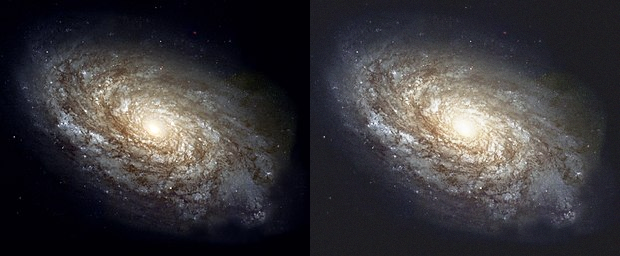

In [12]:
#NO3 AV 100

dst = cv_img[0]
noise_number = 99 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Psnr value',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

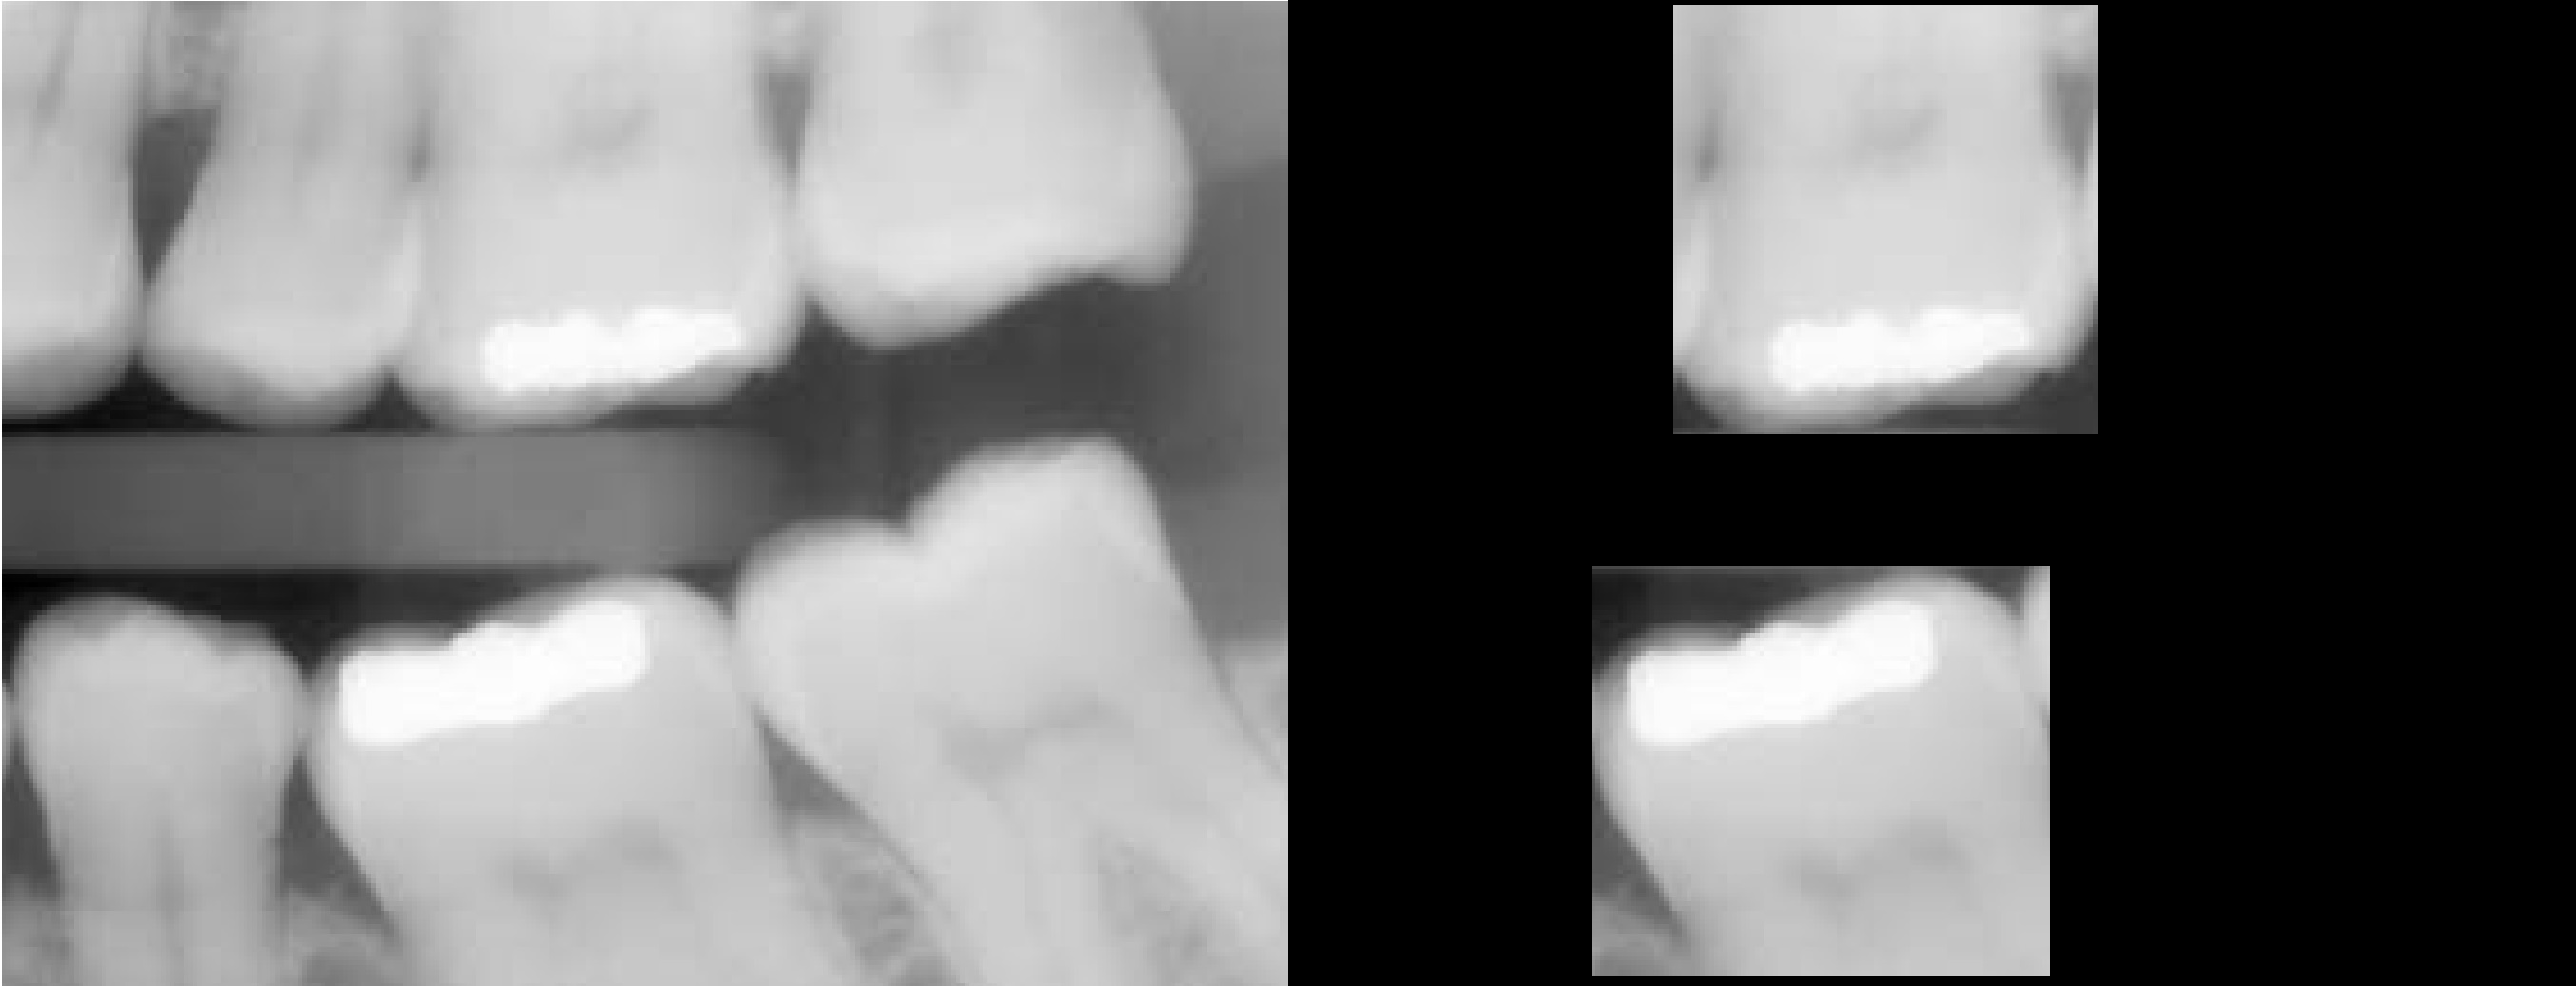

In [8]:
#NO4

img = cv.imread('/content/drive/MyDrive/Image_PCVK/teeth.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result = img & mask1

final_frame = cv.hconcat((img, result))
cv2_imshow(final_frame)

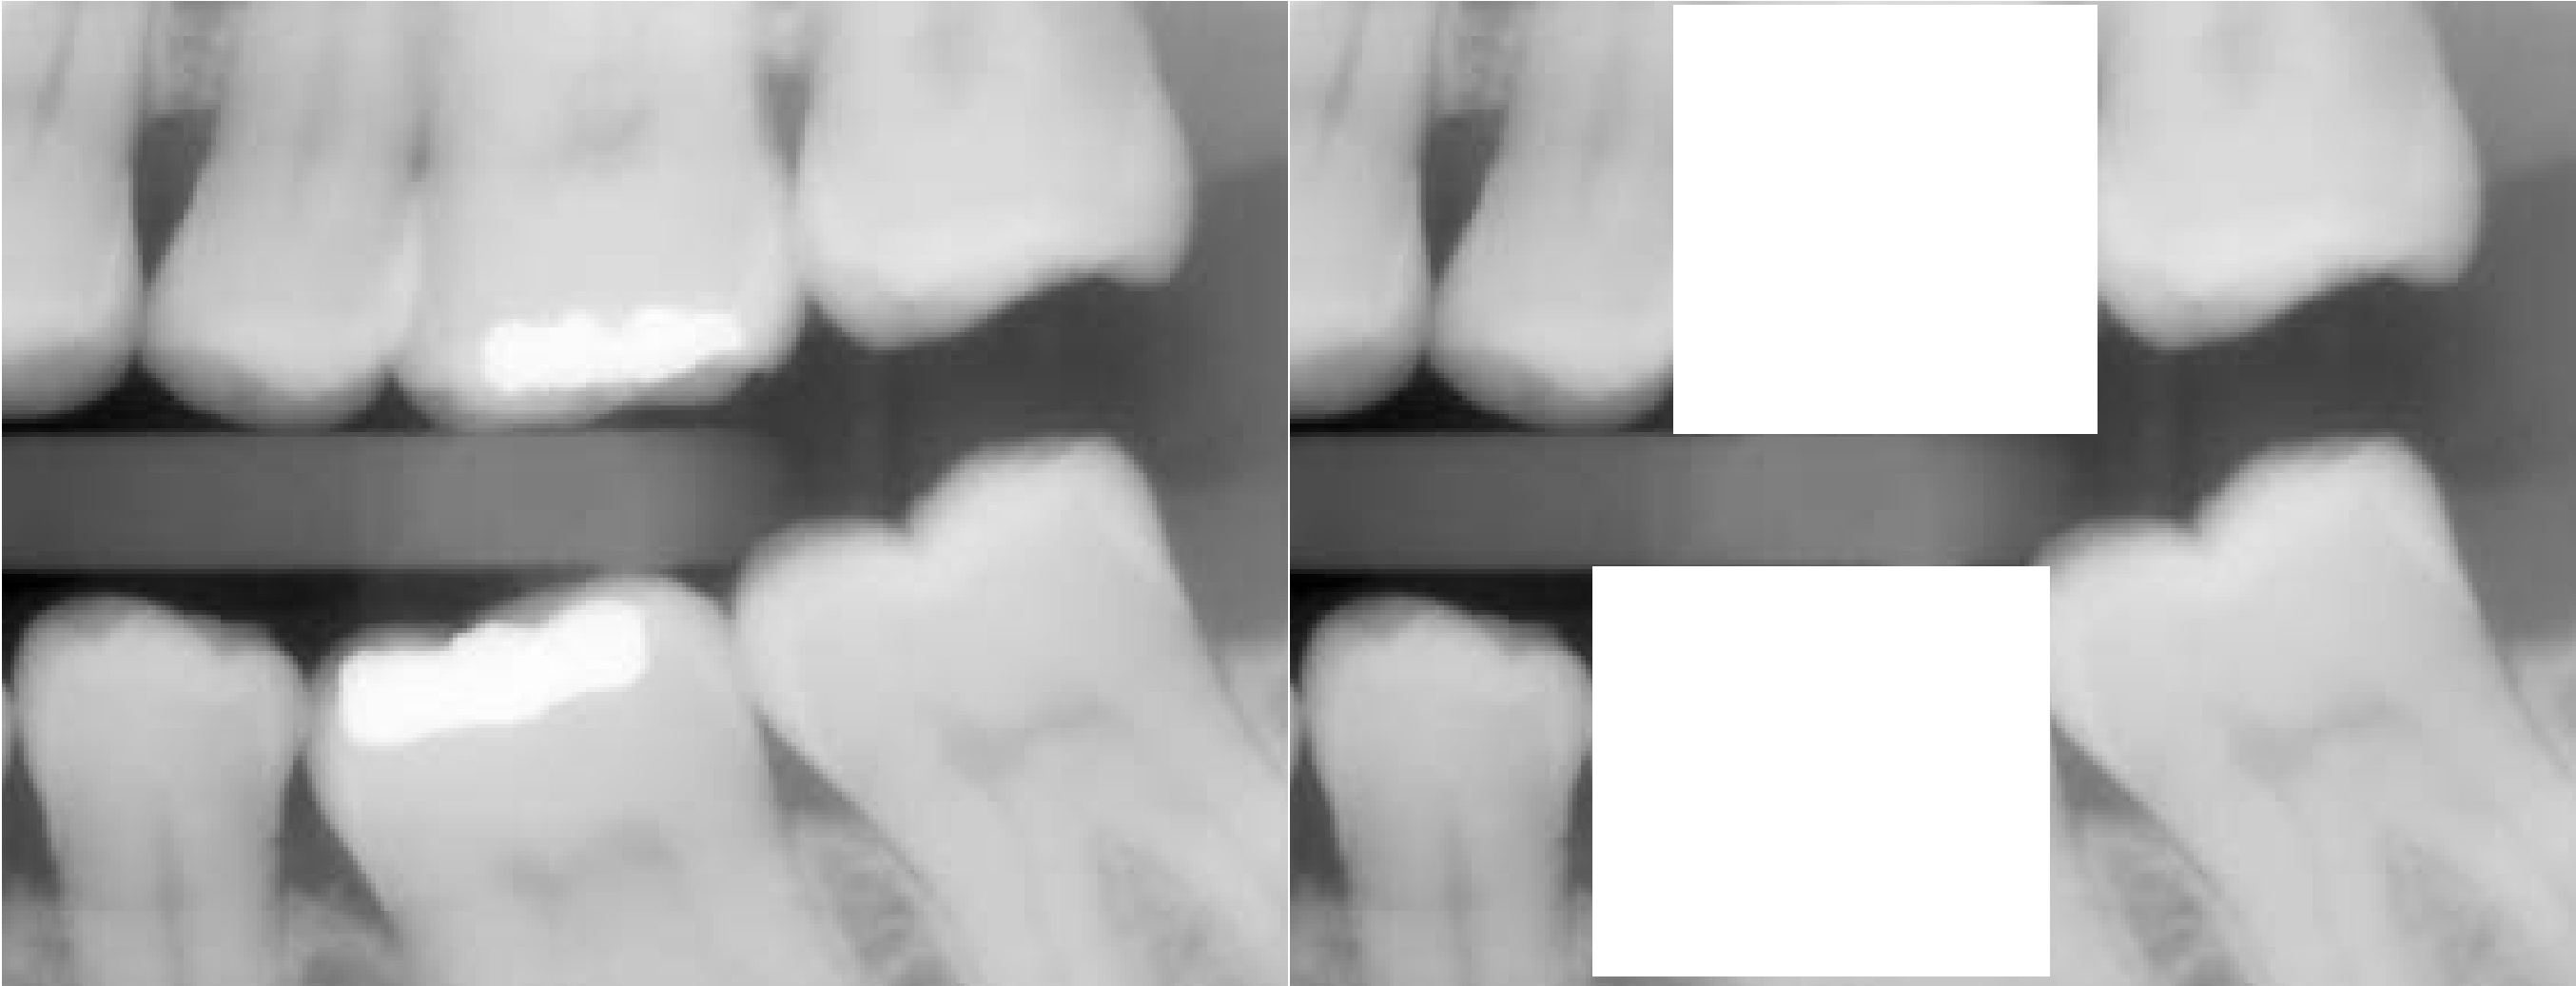

In [10]:
#NO 5 OR

img = cv.imread('/content/drive/MyDrive/Image_PCVK/teeth.jpg')
mask_or = np.zeros(img.shape, dtype=np.uint8)
mask_or = cv.rectangle(mask_or,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img | mask_or

mask_or1 = cv.rectangle(mask_or,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_or1 = img | mask_or1

final_frame = cv.hconcat((img, result_or1))
cv2_imshow(final_frame)

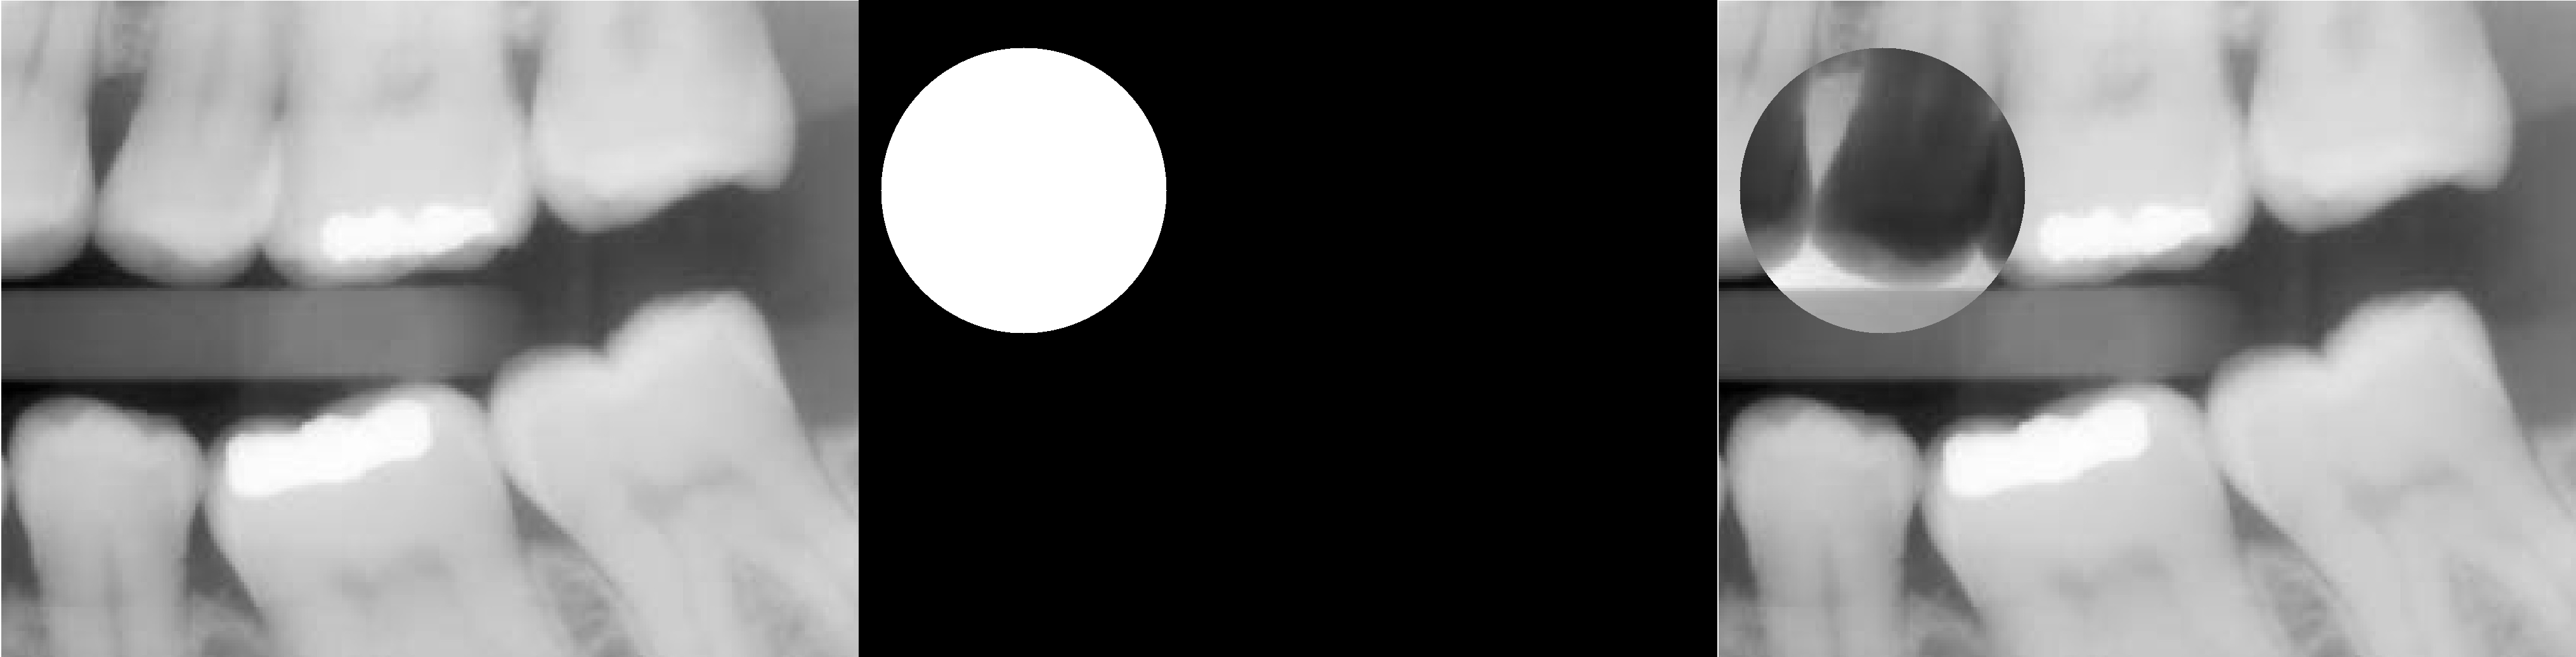

In [11]:
#NO5 NOT

img = cv.imread('/content/drive/MyDrive/Image_PCVK/teeth.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

result = img ^ mask

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)


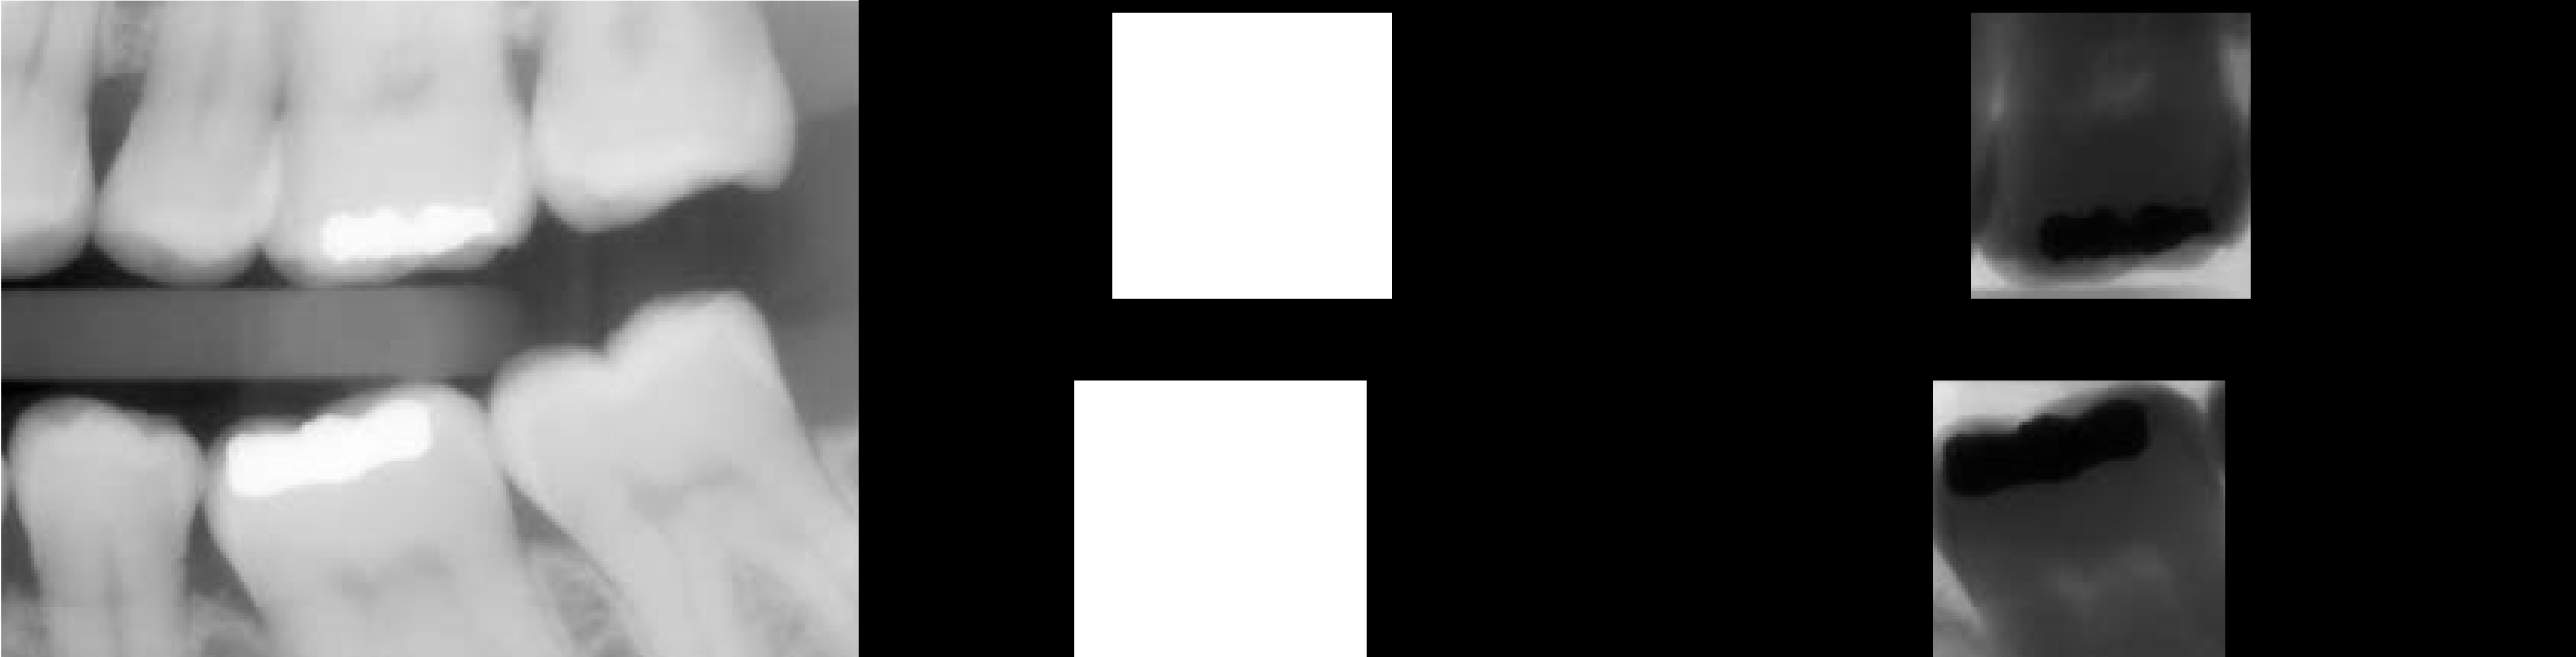

In [12]:
#NO5 NAND

img = cv.imread('/content/drive/MyDrive/Image_PCVK/teeth.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(400,20),pt2=(840,470),color=(255,255,255), thickness=-1)
mask = cv.rectangle(mask,pt1=(340,600),pt2=(800,1200),color=(255,255,255), thickness=-1)

result = ~img & mask

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

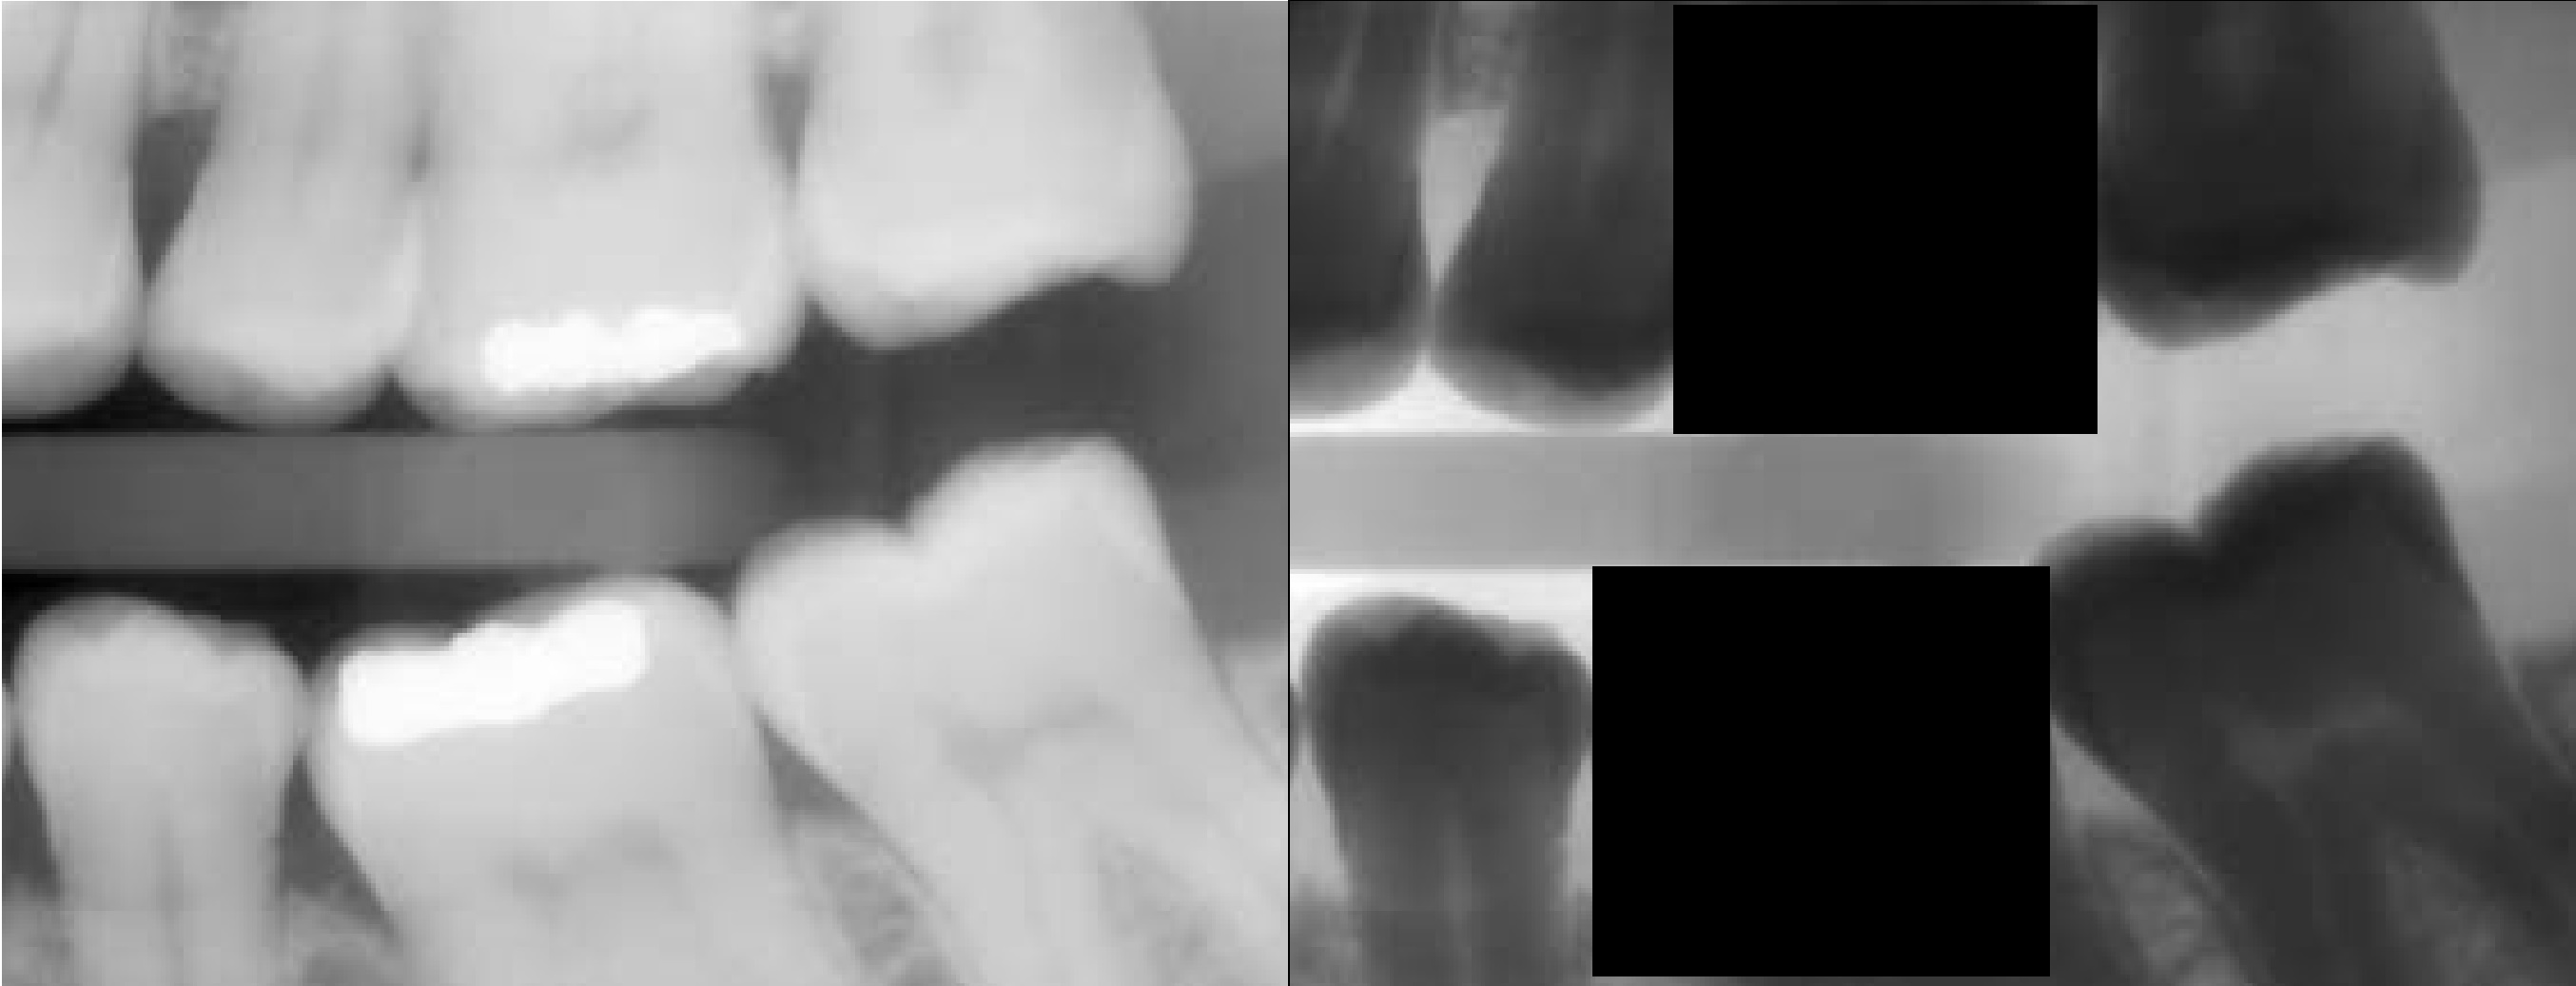

In [13]:
#N05 XOR

img = cv.imread('/content/drive/MyDrive/Image_PCVK/teeth.jpg')
mask_not = np.zeros(img.shape, dtype=np.uint8)
mask_not = cv.rectangle(mask_not,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = ~img & ~mask_not

mask_not1 = cv.rectangle(mask_not,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_not1 = ~img & ~mask_not1

final_frame = cv.hconcat((img, result_not1))
cv2_imshow(final_frame)